#**Netflix Project**
(By Priyanka)

In [ ]:
#Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')     # To ignore unnecessary warning messages for cleaner outputs

In [ ]:
!pip install gdown

In [ ]:
!gdown --id 17pbMALawXXcdo9Vmbl_-VWkXOKJO3ZRs --output netflix_dataset.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17pbMALawXXcdo9Vmbl_-VWkXOKJO3ZRs
To: /content/netflix_dataset.csv
100% 3.40M/3.40M [00:00<00:00, 289MB/s]


In [ ]:
netflix=pd.read_csv('netflix_dataset.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observation:**

*  The data has **8807** **rows** and **12** **columns** where each row is representing a show with unique show id.
* Each record have different **attributes** of each show like its *type,
directors, cast, date when added to netflix, release date, duration, country, title* etc.

* Among different attributes only one column is of **integer data type** i.e. *release date*, all other columns are of **object datatype**.

*  Additionaly, columns like *director, cast, country, date added, rating, duration* even have **missing values** which needs to be handled for better analysis.

**Question 1**: Find the counts of each categorical variable both using graphical and non-
graphical analysis.
a. For Non-graphical Analysis:
Solution: We see except the column release year all the columns are categorical. We will analyse each column one by one graphically as well as non graphically

**Category : show_id**

In [ ]:
# Checking the number of times each show_id appears (should all be 1)
show_id_counts = netflix['show_id'].value_counts()
print("Unique counts of show_id occurrences:", show_id_counts.unique())


Unique counts of show_id occurrences: [1]


In [ ]:
netflix['show_id'].isnull().sum()    #There is no missing value present in the column show id now.

np.int64(0)

In [ ]:
print("Number of unique show_id category:",netflix['show_id'].nunique())

Number of unique show_id category: 8807


**Observation on show_id column**:
- There are **no missing values** in the `show_id` column.  
- All `show_id`s are **unique**, confirming that each row represents a unique Netflix title.  
- This column can be safely used as a **unique identifier** and does not need further analysis.

**Next** **Category**: **Type**

In [ ]:
netflix['type'].isnull().sum()       #No null values present in the column 'type'

np.int64(0)

In [ ]:
print("Number of unique 'type' category:",netflix['type'].nunique())

Number of unique 'type' category: 2


In the given dataset Netflix, we only have two type of entries either the row corresponds to **Movie** or **TV Show**.

In [ ]:
# Type categories(Non-graphical analysis)
print('Value counts for column: type')
print(netflix['type'].value_counts())

Value counts for column: type
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


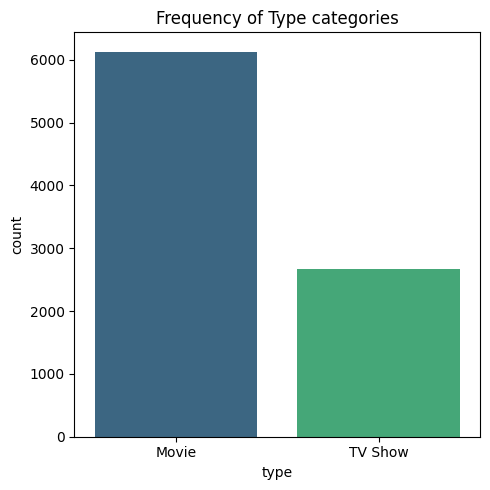

In [ ]:
#Graphical analysis of type category
plt.figure(figsize=(5,5))
sns.countplot(x='type', data=netflix, order=netflix['type'].value_counts().index, palette='viridis')
plt.title('Frequency of Type categories')
plt.tight_layout()
plt.show()

**Observation on 'type' category:**

- There are **no missing values** in the `type` column.  
- The dataset contains **6131 Movies (69.6%)** and **2676 TV Shows (30.4%)**, showing that most content is Movies.  
- Graphical analysis confirms this distribution.  

**Business Insight:**
- Currently, Netflix has a stronger focus on Movies.  
- To **grow engagement and subscription**, the platform could increase the number of **TV Shows**, which are currently underrepresented.


**Next Category: Title**

In [ ]:
#Checking missing values in title
netflix['title'].isnull().sum()

np.int64(0)

In [ ]:
#Checking unique titles
print("Total number of unique titles :",netflix['title'].nunique())

Total number of unique titles : 8807


**Observation on 'title' column:**

- There are **no missing values** in `title`.  
- All **8,807 titles are unique**, confirming that each row represents a distinct show or movie.  
- The `title` column can be safely used as a **display name for viewers** and does not require further analysis.


In [ ]:
#Displaying first 5 titles in the dataset
netflix['title'].head()

,title
0,Dick Johnson Is Dead
1,Blood & Water
2,Ganglands
3,Jailbirds New Orleans
4,Kota Factory


**Next Category: Director**

In [ ]:
#Checking missing values in the director column
netflix['director'].isnull().sum()

np.int64(2634)

Here in this column director we have **2634 null values**. So we need to handle them before analysing the data.

In [ ]:
#Filling missing values with 'unknown director'
netflix['director'].fillna('unknown director',inplace=True)

This commands replaces all the null values in this column with 'unknown director'.

In [ ]:
netflix['director'].isnull().sum()   #No missing values now

np.int64(0)

In [ ]:
print("Total number of unique director category:",netflix['director'].nunique())

Total number of unique director category: 4529


**Observation:**
- It shows that there are **4529** unique entries.
- But important point here to note is that many entry contain multiple director names so it counts the whole combination as one.
- To better analyse the data director wise we first **need to unnest** the column director and then analyse.

In [ ]:
#Strip director column by comma into a list
netflix['director_list']=netflix['director'].str.split(',')
print(netflix['director_list'].head())

0     [Kirsten Johnson]
1    [unknown director]
2     [Julien Leclercq]
3    [unknown director]
4    [unknown director]
Name: director_list, dtype: object


In [ ]:
# Strip trailing/leading whitespace from each director's name in the list
netflix['director_list'] = netflix['director_list'].apply(lambda x: [director.strip() for director in x])

In [ ]:
# Explode the 'director_list' to unnest the data so each director has its separate row
netflix_unnested_director = netflix.explode('director_list').reset_index(drop=True)

In [ ]:
# Replace empty strings in 'director_list' of netflix_unnested_director with 'unknown director'
netflix_unnested_director['director_list'] = netflix_unnested_director['director_list'].replace('', 'unknown director')

Splitting and stripping process might have created some empty entries. This command replaces those empty entries into unknown director.

In [ ]:
#Dropping the original director column
netflix_unnested_director.drop(columns='director', inplace= True)

In [ ]:
# Confirm no nulls and check shape
netflix_unnested_director['director_list'].isna().sum()

np.int64(0)

In [ ]:
# Count unique directors after unnesting
netflix_unnested_director.shape

(9612, 12)

In [ ]:
print("Number of unique directors category:",netflix_unnested_director['director_list'].nunique())

Number of unique directors category: 4994


**Observation:**

- Now after unnesting this director column we got new dataset named netflix_unnested_director.
- After unnesting, the dataset contains **4,994 unique directors**, with one director per row.
- This allows us to analyze each director's contribution to Netflix shows individually.

In [ ]:
# Top 10 most frequent director categories(Non-graphical analysis)
print("Top 10 most frequent directors:\n")
print(netflix_unnested_director['director_list'].value_counts().head(10))

Top 10 most frequent directors:

director_list
unknown director       2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Youssef Chahine          12
Name: count, dtype: int64


**Observation:**
- The director **Rajiv Chilaka** has directed the most shows on Netflix.  
- The next most frequent is **Jan Suter**, followed by other directors with 10+ shows.  
- These directors are the most influential in terms of content production on the platform.


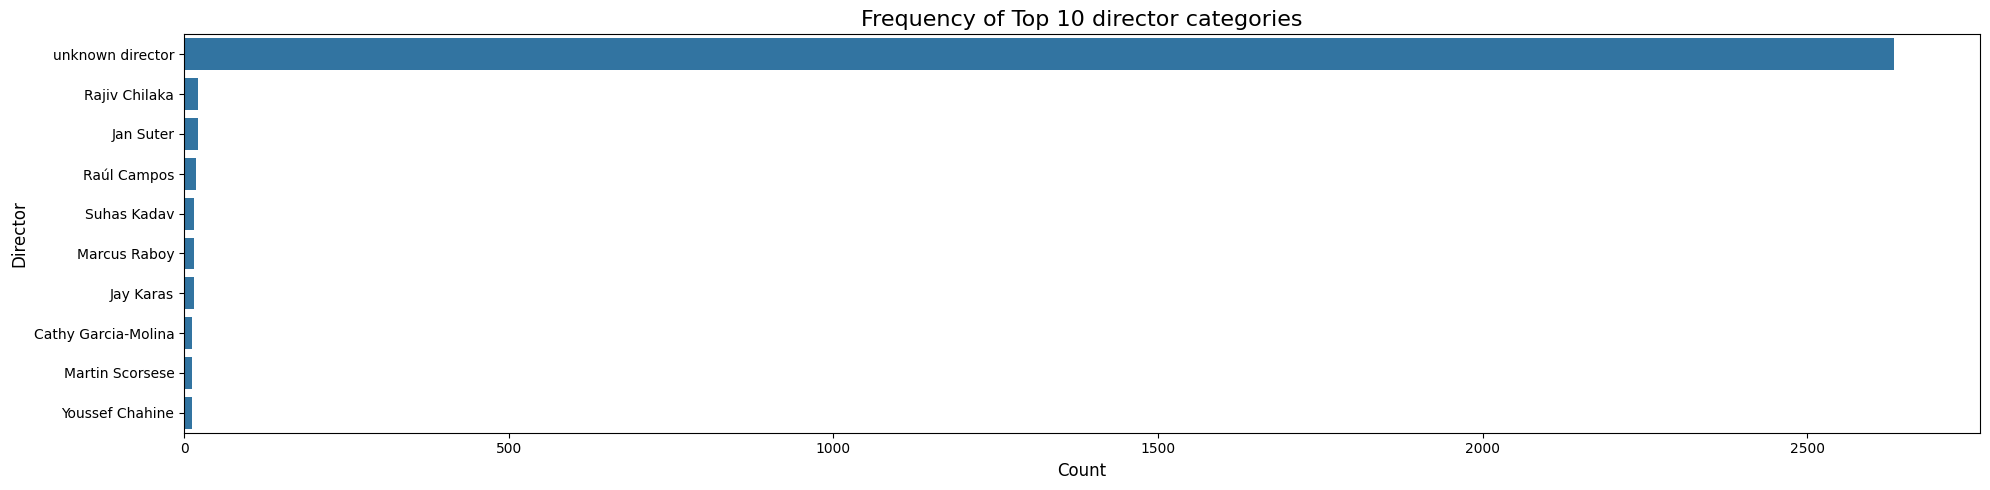

In [ ]:
#Graphical analysis of Top 10 most frequent director category
plt.figure(figsize=(20,5))
sns.countplot(y='director_list', data=netflix_unnested_director, order=netflix_unnested_director['director_list'].value_counts().head(10).index)
plt.title('Frequency of Top 10 director categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

**Observation:**
- Graphical analysis confirms that **Rajiv Chilaka** has directed the most shows.  
- Many directors have contributed 10+ shows, showing a concentration of content production among top directors.

**Business Insight:**
- Netflix may consider collaborating more with **top-performing directors** to maintain or increase viewer engagement.  
- Identifying prolific directors can also help in **promoting shows** and strategizing content production.
- Content creation is concentrated among a few prolific directors.  
- Netflix should continue working with top-performing directors for consistent hits.  
- Encouraging emerging directors and exploring different genres can increase content variety.  
- Leveraging directors specializing in regional content can enhance global reach.


**Next Category: Cast**

In [ ]:
#Checking missing values in cast column
netflix['cast'].isnull().sum()

np.int64(825)

In [ ]:
#Filling missing values with 'unknown cast'
netflix['cast'].fillna('unknown cast',inplace=True)

In [ ]:
#Recheching null values
netflix['cast'].isnull().sum()

np.int64(0)

In [ ]:
print("Toyal number of unique cast entries:",netflix['cast'].nunique())

Toyal number of unique cast entries: 7693


In [ ]:
netflix['cast'].head()

,cast
0,unknown cast
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,unknown cast
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


**Observation:**
- There are no missing values in `cast` after filling.  
- The column contains **strings with multiple cast members per show**, so unnesting is required for proper analysis.


In [ ]:
# Split cast strings into a list
netflix['cast_list']=netflix['cast'].str.split(',')
print(netflix['cast_list'].head())

0                                       [unknown cast]
1    [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
2    [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
3                                       [unknown cast]
4    [Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
Name: cast_list, dtype: object


In [ ]:
# Strip whitespace from each cast member's name in the list
netflix['cast_list'] = netflix['cast_list'].apply(lambda x: [cast.strip() for cast in x])

In [ ]:
# Explode the 'cast_list' to unnest the data
netflix_unnested_cast = netflix.explode('cast_list').reset_index(drop=True)

In [ ]:
# Replace empty strings in 'cast_list' of netflix_unnested_cast with 'unknown cast'
netflix_unnested_cast['cast_list'] = netflix_unnested_cast['cast_list'].replace('', 'unknown cast')

Splitting and stripping process might have created some empty entries. This command replaces those empty entries into unknown cast.

In [ ]:
netflix_unnested_cast.drop(columns='cast', inplace= True)

In [ ]:
netflix_unnested_cast['cast_list'].isna().sum()

np.int64(0)

In [ ]:
netflix_unnested_cast.shape

(64951, 13)

In [ ]:
print("Number of unique cast members category:",netflix_unnested_cast['cast_list'].nunique())

Number of unique cast members category: 36440


**Observation:**
- After unnesting, the dataset has **64,951 rows** and **36,440 unique actors**.  
- Each row now represents a single cast member for a single show, enabling individual actor analysis.


In [ ]:
# Top 10 most frequent cast categories(Non-graphical analysis)
print('Value counts for column: cast')
print(netflix_unnested_cast['cast_list'].value_counts().head(10))

Value counts for column: cast
cast_list
unknown cast        825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: count, dtype: int64


**Observation:**
- Ignoring 'unknown cast' rows, **Anupam Kher** has appeared in the most shows (43), followed by **Shah Rukh Khan** (35).  
- The top 10 actors contribute significantly to Netflix’s content, indicating a concentration of appearances among a few actors.


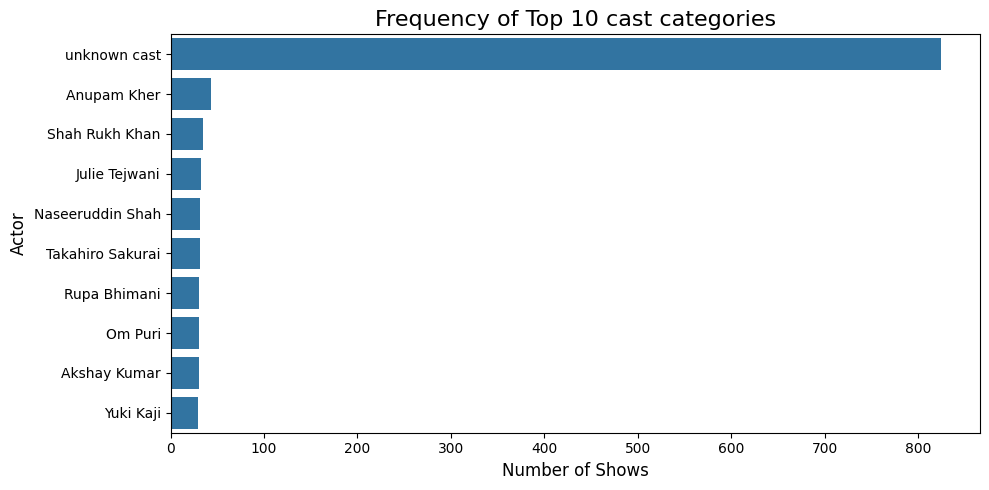

In [ ]:
#Graphical analysis of Top 10 most frequent cast category
plt.figure(figsize=(10,5))
sns.countplot(y='cast_list', data=netflix_unnested_cast, order=netflix_unnested_cast['cast_list'].value_counts().head(10).index)
plt.title('Frequency of Top 10 cast categories', fontsize=16)
plt.xlabel('Number of Shows', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()
plt.show()

**Business Insights:**

- Most shows feature a small group of high-frequency actors.  
- Netflix should continue leveraging top actors for hit shows.  
- Introducing new talent can increase content diversity and attract new subscribers.  
- Regional actor analysis can guide targeted content for specific markets.


**Next Category: Country**

In [ ]:
#Checking missing values in 'country' column
netflix['country'].isnull().sum()

np.int64(831)

The column country has 831 null values which need to be addressed.

In [ ]:
#Filling missing values with 'unknown country'
netflix['country'].fillna('unknown country',inplace=True)

In [ ]:
#Confirming null values filled
netflix['country'].isnull().sum()

np.int64(0)

In [ ]:
print("Number of unique country category:",netflix['country'].nunique())

Number of unique country category: 749


In [ ]:
netflix['country'].head()

,country
0,United States
1,South Africa
2,unknown country
3,unknown country
4,India


**Observation:**
- After filling missing values, there are no nulls.  
- The `country` column contains **multiple countries per show**, so unnesting is required.  


In [ ]:
# Split multiple countries into a list
netflix['country_list']=netflix['country'].str.split(',')
print(netflix['country_list'].head())

0      [United States]
1       [South Africa]
2    [unknown country]
3    [unknown country]
4              [India]
Name: country_list, dtype: object


In [ ]:
# Strip whitespace from each country's name in the list
netflix['country_list'] = netflix['country_list'].apply(lambda x: [country.strip() for country in x])

In [ ]:
# Explode the 'country_list' to unnest the data
netflix_unnested_country = netflix.explode('country_list').reset_index(drop=True)

In [ ]:
# Replace empty strings in 'country_list' of netflix_unnested_country with 'unknown country'
netflix_unnested_country['country_list'] = netflix_unnested_country['country_list'].replace('', 'unknown country')

In [ ]:
# Drop original 'country' column
netflix_unnested_country.drop(columns='country', inplace= True)

In [ ]:
netflix_unnested_country['country_list'].isna().sum()

np.int64(0)

In [ ]:
netflix_unnested_country.shape

(10850, 14)

In [ ]:
print("Number of unique country's category:",netflix_unnested_country['country_list'].nunique())

Number of unique country's category: 123


**Observation:**
- After unnesting, there are **123 unique countries**.  
- Each row now represents a single country for a single show, suitable for country-wise analysis.


In [ ]:
# Top 10 most frequent cast categories(Non-graphical analysis)
print('Value counts for column: country_list')
print(netflix_unnested_country['country_list'].value_counts().head(10))

Value counts for column: country_list
country_list
United States      3690
India              1046
unknown country     838
United Kingdom      806
Canada              445
France              393
Japan               318
Spain               232
South Korea         231
Germany             226
Name: count, dtype: int64


**Observation:**
- **United States** produced the most shows/movies (3,690), followed by **India** (1,046), then **United Kingdom**.  
- There is a clear concentration of content production in a few countries.


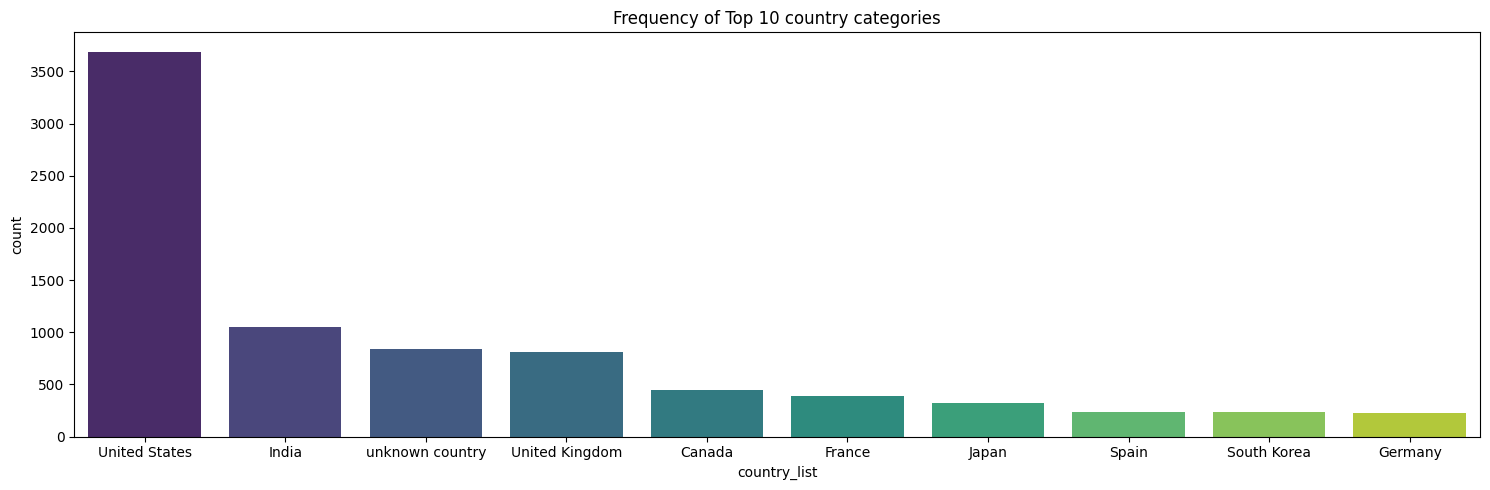

In [ ]:
#Graphical analysis of Top 10 most frequent country categories
plt.figure(figsize=(15,5))
sns.countplot(x=netflix_unnested_country['country_list'], data=netflix_unnested_country, order=netflix_unnested_country['country_list'].value_counts().head(10).index, palette='viridis')
plt.title('Frequency of Top 10 country categories')
plt.tight_layout()
plt.show()

**Business Insights:**

- Most content is produced in a few countries, led by the United States.  
- Netflix can expand production in underrepresented regions to attract new audiences.  
- Regional content analysis can guide marketing and production strategies.  
- Incentivizing creators in low-production countries can increase content diversity and global subscriptions.


**Next Category: date_added**

In [ ]:
# Checking missing values
netflix['date_added'].isnull().sum()

np.int64(10)

In [ ]:
netflix['date_added'].fillna('unknown date_added',inplace=True)

In [ ]:
netflix['date_added'].isnull().sum()

np.int64(0)

In [ ]:
print("Number of unique date_added category:",netflix['date_added'].nunique())

Number of unique date_added category: 1768


In [ ]:
# Creating dataset with valid dates
netflix_dated=netflix[netflix['date_added']!='unknown date_added'].copy()
netflix_dated.shape

(8797, 15)

In [ ]:
netflix_dated['date_added'].dtype

dtype('O')

In [ ]:
# Cleaning whitespace and converting to datetime

netflix_dated['date_added'] = netflix_dated['date_added'].str.strip()
netflix_dated['date_added']=pd.to_datetime(netflix_dated['date_added'],errors='coerce')

In [ ]:
netflix_dated['date_added'].dtype

dtype('<M8[ns]')

In [ ]:
# Extract year and month for analysis
netflix_dated['year_added'] = netflix_dated['date_added'].dt.year
netflix_dated['month_added'] = netflix_dated['date_added'].dt.month_name()


In [ ]:
# Top 10 most frequent date_added categories(Non-graphical analysis)
print('Value counts for column: date_added')
print(netflix_dated['date_added'].value_counts().head(10))

Value counts for column: date_added
date_added
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
2019-10-01     62
2021-07-01     60
2018-11-01     60
2021-09-01     56
2018-01-01     55
Name: count, dtype: int64


Observation:
Most of the movie/shows are added on New Year of 2020. Also in 2018 and 2019 1st Nov had a lot of addition. In 2019 New year eve 31st Dec also recorded a lot of addition and the next day has highest addition. New Year in 2018 has 55 addition.

In [ ]:
# Top 10 most frequent year_added categories(Non-graphical analysis)
print('Value counts for column: year_added')
print(netflix_dated['year_added'].value_counts().head(10))

Value counts for column: year_added
year_added
2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
Name: count, dtype: int64


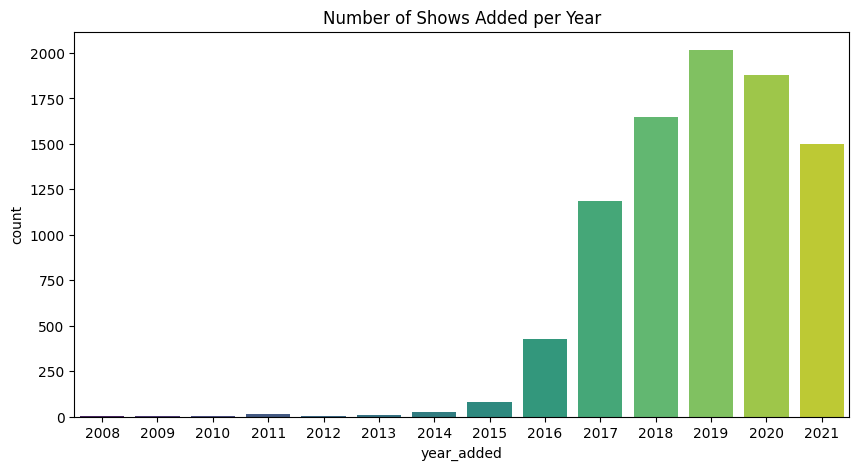

In [ ]:
#Graphical analysis of year added
plt.figure(figsize=(10,5))
netflix_dated['year_added'] = netflix_dated['date_added'].dt.year
sns.countplot(x='year_added', data=netflix_dated, palette='viridis')
plt.title('Number of Shows Added per Year')
plt.show()

**Business Insight:**

- Netflix steadily increases content to stay competitive against other streaming platforms.

- Peaks in certain years suggest strategic investment in content acquisition/production.

- Fluctuations might indicate shifts in content strategy or budget allocation.

**Recommenadtions:**
- Netflix should distribute content additions more evenly.
- Netflix can target local & global holiday to drive localised subscriber growth.


Monthwise trend

In [ ]:
# Top 10 most frequent date_added categories(Non-graphical analysis)
print('Value counts for column: month_added')
print(netflix_dated['month_added'].value_counts().head(12))

Value counts for column: month_added
month_added
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: count, dtype: int64


**Observation:**
- High addition month are July, December and September means Netflix focuses on holidays and summer period for major releases.
- Netflix has fewer additions in the months of February, May, November
- Moderate addition months are the remaining months

**Business Insights:**
- Netflix can capitalise on high addition holiday months by launching blockbuster movies and exclusive content
- In the off-peak months Netflix can enhance subscriber engagement by adding short series, documentaries.
- Netflix can introduce monthly content calendar for subscribers

**Next Category : rating**

In [ ]:
#Finding missing values that needs to be treated
netflix['rating'].isnull().sum()

np.int64(4)

In [ ]:
#Filling missing values with 'Unknown rating
netflix['rating'].fillna('Unknown rating',inplace=True)

In [ ]:
netflix['rating'].isnull().sum()    #No missing values now

np.int64(0)

In [ ]:
print("Number of unique rating category:",netflix['rating'].nunique())

Number of unique rating category: 18


In [ ]:
# All rating categories(Non-graphical analysis)
print('Value counts for column: rating')
print(netflix['rating'].value_counts().head(19))

Value counts for column: rating
rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
Unknown rating       4
NC-17                3
UR                   3
66 min               1
74 min               1
84 min               1
Name: count, dtype: int64


**Observation:**
- The most frequent ratings are **TV-MA** and **TV-14** (adult/teen content).
- Out of 8,807 titles, **TV-MA** forms the largest share (~36%), followed by **TV-14**.
- Also we have few family/children ratings (TV-G/TV-Y), showing a skew toward mature content.


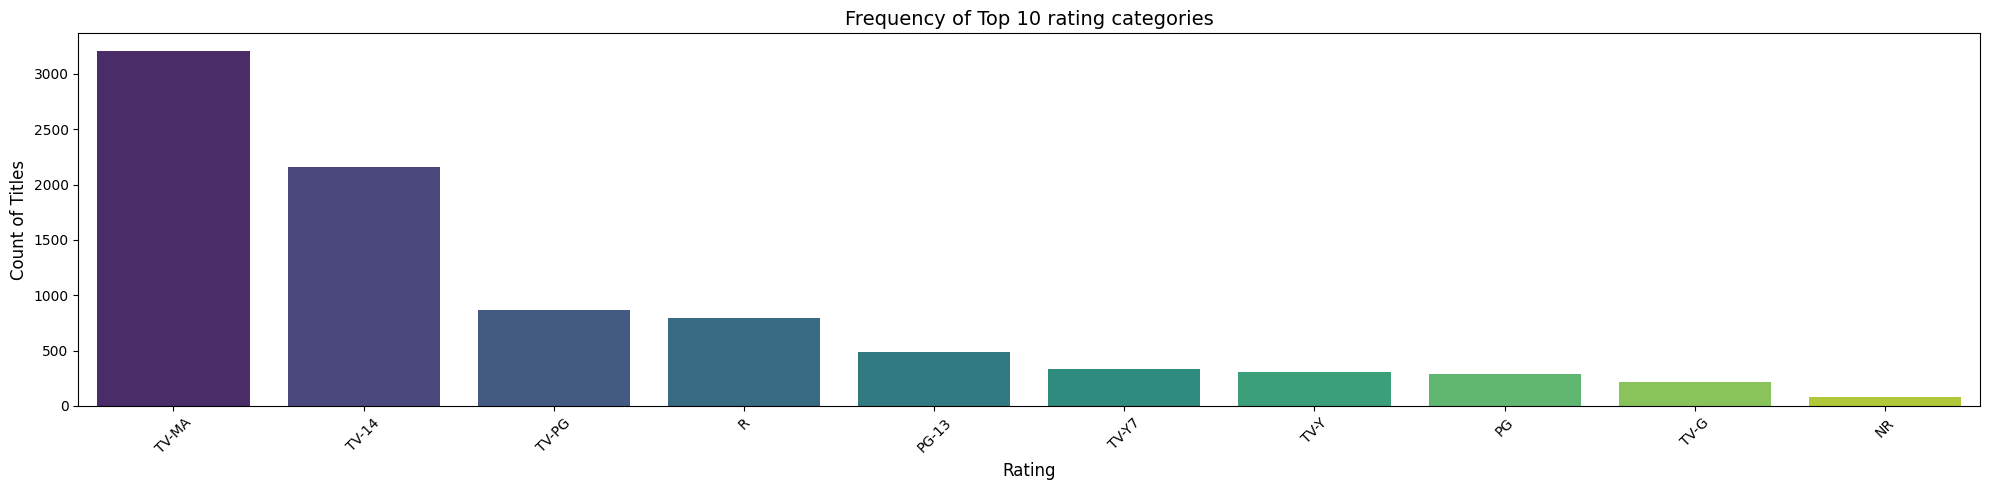

In [ ]:
#Graphical analysis of Top 10 most frequent rating categories
plt.figure(figsize=(20,5))
sns.countplot(x=netflix['rating'], data=netflix, order=netflix['rating'].value_counts().head(10).index, palette='viridis')
plt.title('Frequency of Top 10 rating categories',fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Business Insights & Recommendations (Rating):**

-  Currently netflix focuses heavily toward teen/adult content (TV-MA, TV-14). This suggests Netflix’s primary content strategy targets older demographics.
- Family/kids ratings are underrepresented. Netflix can increase investment in PG/TV-G/TV-Y content to attract family subscribers.
- Scheduling can be done. Promote TV-MA/TV-14 titles in evening/weekend slots; schedule family content releases near holidays to maximize family-viewing engagement.


**Next Category :Duration**

In [ ]:
#Finding missing values in duration column
netflix['duration'].isnull().sum()

np.int64(3)

In [ ]:
#Replacing missing values from duration column with 'unknown duration'
netflix['duration'].fillna('Unknown duration',inplace=True)

In [ ]:
#Rechecking null values
netflix['duration'].isnull().sum()

np.int64(0)

In [ ]:
#Checking number of unique duration
print("Number of unique duration category:",netflix['duration'].nunique())

Number of unique duration category: 221


In [ ]:
# Top 10 most frequent duration categories(Non-graphical analysis)
print('Value counts for column: duration')
print(netflix['duration'].value_counts().head(10))

Value counts for column: duration
duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64


**Observations (Duration):**
- The most frequent duration overall is **“1 Season”**, followed by “2 Seasons” and “3 Seasons”, showing a large share of short TV series.
- Among movies, most are around **90–100 minutes** long — consistent with standard film lengths.
- Very few titles have durations beyond 3 seasons, showing Netflix prefers shorter, bingeable series formats.


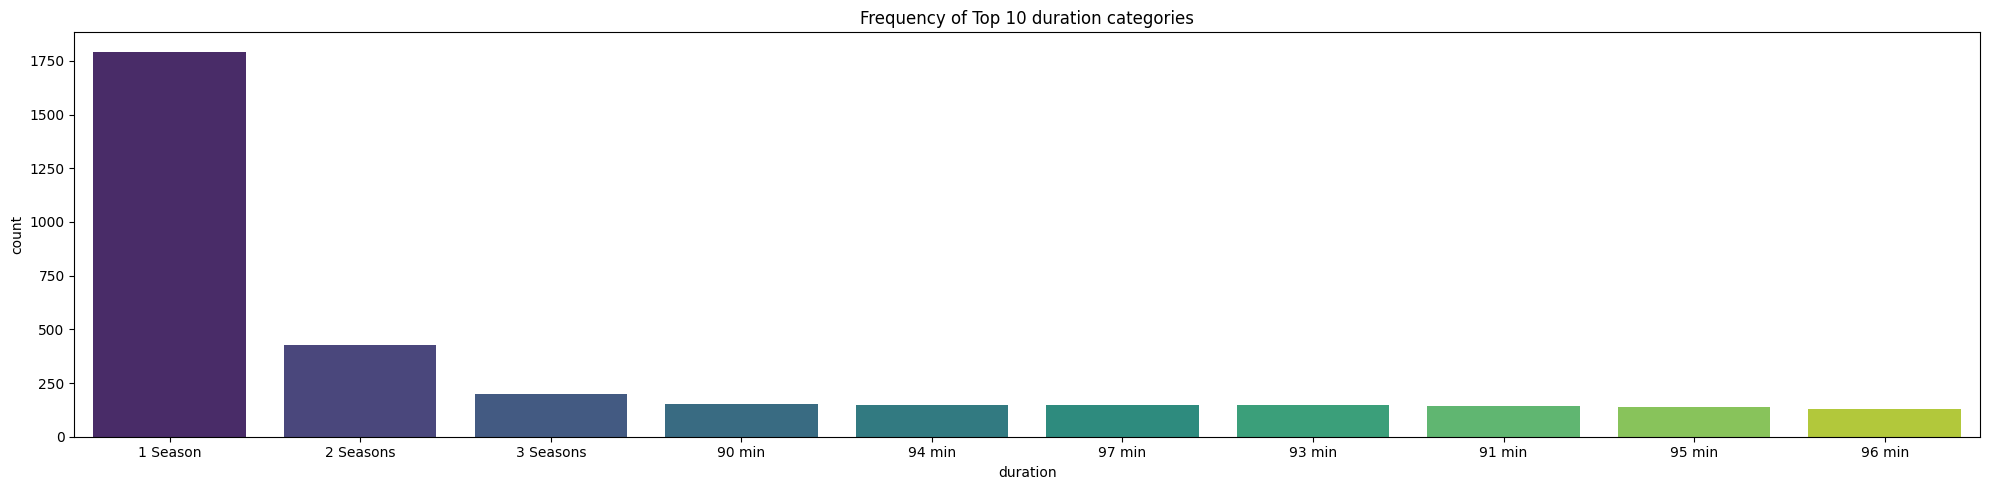

In [ ]:
#Graphical analysis of Top 10 most frequent duration categories
plt.figure(figsize=(20,5))
sns.countplot(x=netflix['duration'], data=netflix, order=netflix['duration'].value_counts().head(10).index, palette='viridis')
plt.title('Frequency of Top 10 duration categories')
plt.tight_layout()
plt.show()

**Business Insights & Recommendations (Duration):**

-  **Short-format preference:** Netflix favors 1-season series and  around 90-minute movies means focus on quick-consumption, binge-worthy content.
-  Netflix could invest in extending popular single-season shows into sequels.
-  **Movie optimization:** 80–100 minute duration range performs best; Netflix should maintain this range for efficient content pacing.



**Next Category: listed_in**

In [ ]:
#Checking for missing values
netflix['listed_in'].isna().sum()

np.int64(0)

In [ ]:
print("Number of unique listed_in category:",netflix['listed_in'].nunique())

Number of unique listed_in category: 514


In [ ]:
print(netflix['listed_in'].head(3))

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
Name: listed_in, dtype: object


There are 514 categories. But we need to unnest this coulmn because each entry contains list of multiple categories.

In [ ]:
netflix['listed_list']=netflix['listed_in'].str.split(',')
print(netflix['listed_list'].head())

0                                      [Documentaries]
1    [International TV Shows,  TV Dramas,  TV Myste...
2    [Crime TV Shows,  International TV Shows,  TV ...
3                            [Docuseries,  Reality TV]
4    [International TV Shows,  Romantic TV Shows,  ...
Name: listed_list, dtype: object


In [ ]:
# Strip whitespace from each listed in name in the list
netflix['listed_list'] = netflix['listed_list'].apply(lambda x: [listed.strip() for listed in x])

In [ ]:
# Explode the 'listed_list' to unnest the data
netflix_unnested_listed = netflix.explode('listed_list').reset_index(drop=True)

In [ ]:
# Replace empty strings in 'listed_list' of netflix_unnested_listed with 'unknown listed'
netflix_unnested_listed['listed_list'] = netflix_unnested_listed['listed_list'].replace('', 'Unknown Listed')

In [ ]:
print("Number of unique listed in's category:",netflix_unnested_listed['listed_list'].nunique())

Number of unique listed in's category: 42


In [ ]:
# Top 10 most frequent listed categories(Non-graphical analysis)
print('Value counts for column: listed_list')
print(netflix_unnested_listed['listed_list'].value_counts().head(10))

Value counts for column: listed_list
listed_list
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


**Observation:**
- After unnesting, there are **42 unique content categories** on Netflix.
- Most frequent category of shows on Netflix is International Movies(2752).    
- After that we have Dramas(2427) followed by Comedies, then International TV shows.
- These indicate Netflix’s **strong global and cross-cultural content strategy**.


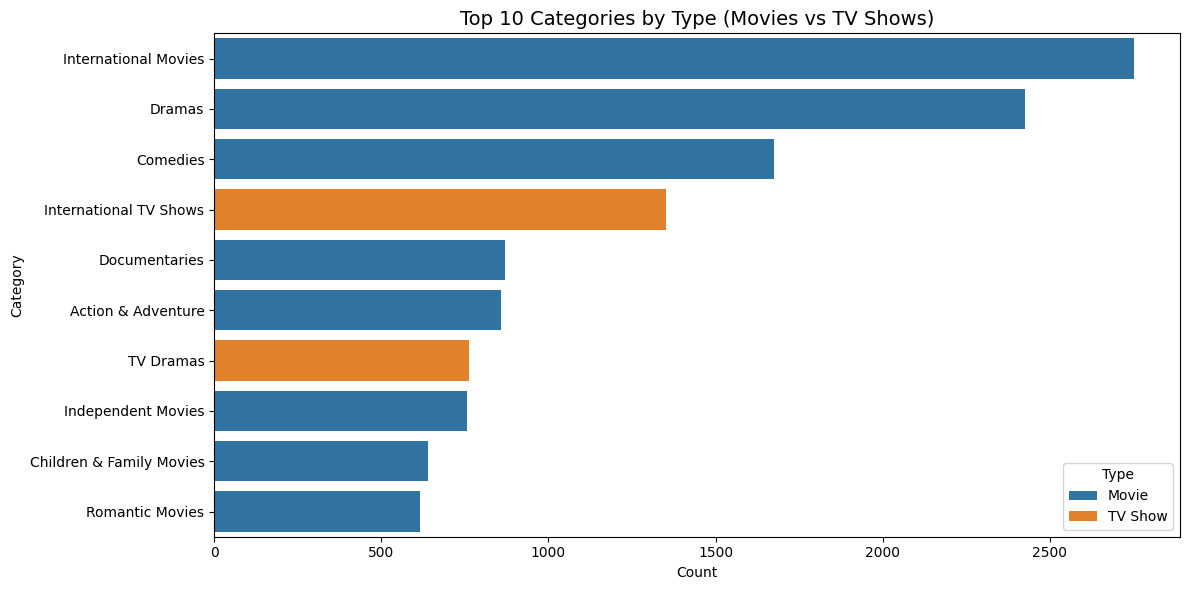

In [ ]:
#Graphical analysis of Top 10 most frequent listed categories
#Comparing Categories by Type(Movies vs TV Shows)
plt.figure(figsize=(12,6))
sns.countplot(y='listed_list', hue='type', data=netflix_unnested_listed,
              order=netflix_unnested_listed['listed_list'].value_counts().head(10).index)
plt.title('Top 10 Categories by Type (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


**Business Insights & Recommendations:**

- There is domination of International titles. Continue expanding dubbing/subtitle support.
- Dramas and comedies are universal crowd-pleasers — Netflix should keep producing region-specific versions.
- Some categories (like Documentaries, Stand-up Comedy, Kids & Family) appear less frequent — potential growth niches.

**Next Category: description**

In [ ]:
print("Number of unique descriptions:",netflix['description'].nunique())


Number of unique descriptions: 8775


In [ ]:
#checking for missing values
netflix['description'].isnull().sum()

np.int64(0)

In [ ]:
# Top 10 most frequent description
print('Value counts for column: description')
print(netflix['description'].value_counts().head(10))

Value counts for column: description
description
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.                        2
As a series of murders hit close to home, a video game designer with post-traumatic stress must confront her demons, or risk becoming their victim.         

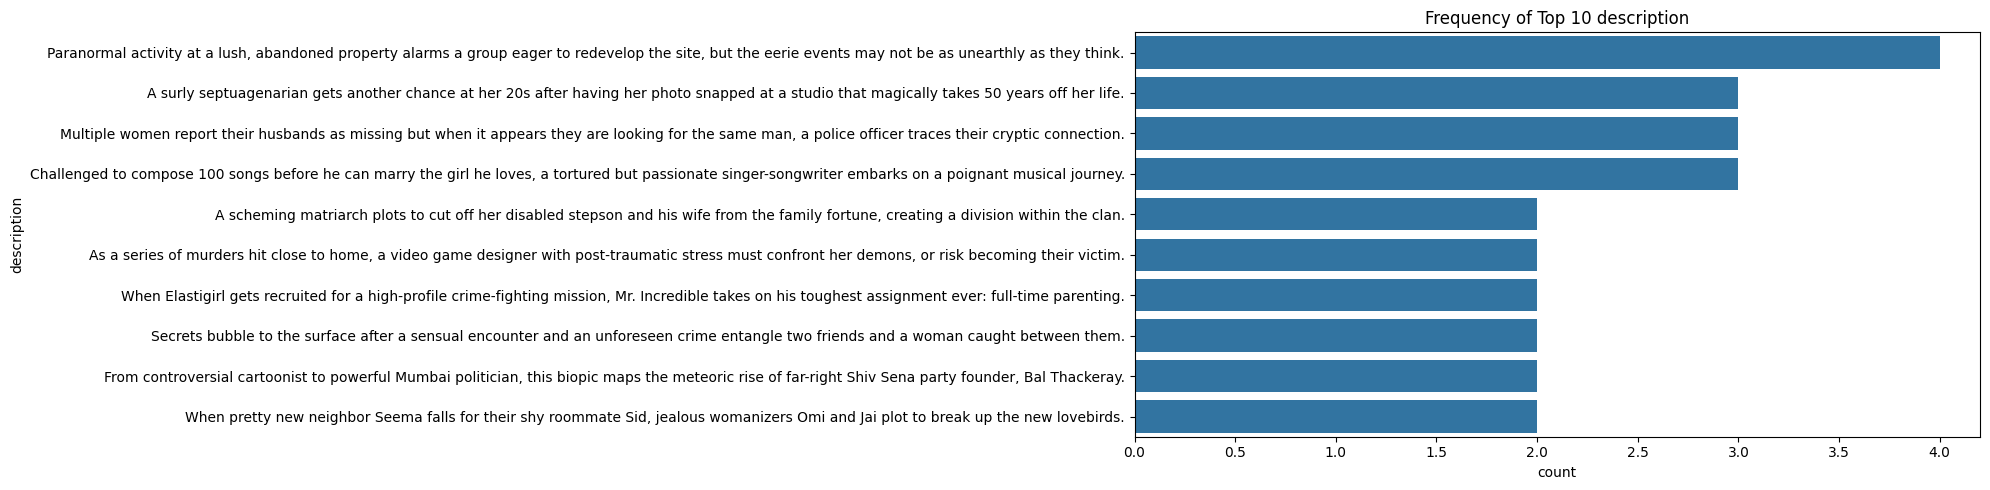

In [ ]:
#Graphical analysis of Top 10 most frequent description categories
plt.figure(figsize=(20,5))
sns.countplot(y=netflix['description'], data=netflix, order=netflix['description'].value_counts().head(10).index)
plt.title('Frequency of Top 10 description')
plt.tight_layout()
plt.show()

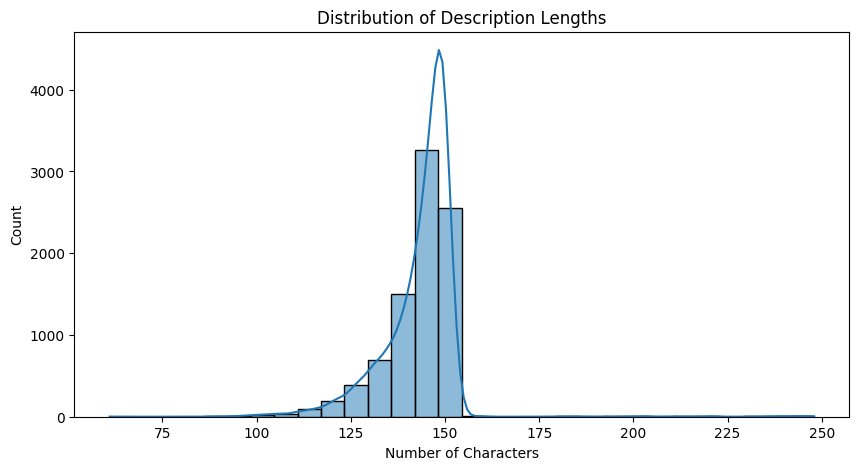

In [ ]:
#Visualize the description length distribution
plt.figure(figsize=(10,5))
sns.histplot(netflix['description'].apply(len), bins=30, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Number of Characters')
plt.show()


**Observations:**
- 'Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think' is the most frequent description found among all the shows/ movies on Netflix.
- Certain descriptions are reused across regional versions of the same show or sequels.

**Recommendations:**
- Standardize metadata — eliminate duplicate or vague descriptions to improve search accuracy.
- Enhance short descriptions (under 50 characters) to improve content visibility in recommendations and previews.

**Next Category: release year**


In [ ]:
#Checking missing values
netflix['release_year'].isna().sum()


np.int64(0)

In [ ]:
netflix['release_year'].fillna(0, inplace=True)


In [ ]:
print("Earliest release year:", netflix['release_year'].min())
print("Most recent release year:", netflix['release_year'].max())
print("Number of unique years:", netflix['release_year'].nunique())


Earliest release year: 1925
Most recent release year: 2021
Number of unique years: 74


In [ ]:
print(netflix['release_year'].value_counts().head(10))


release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64


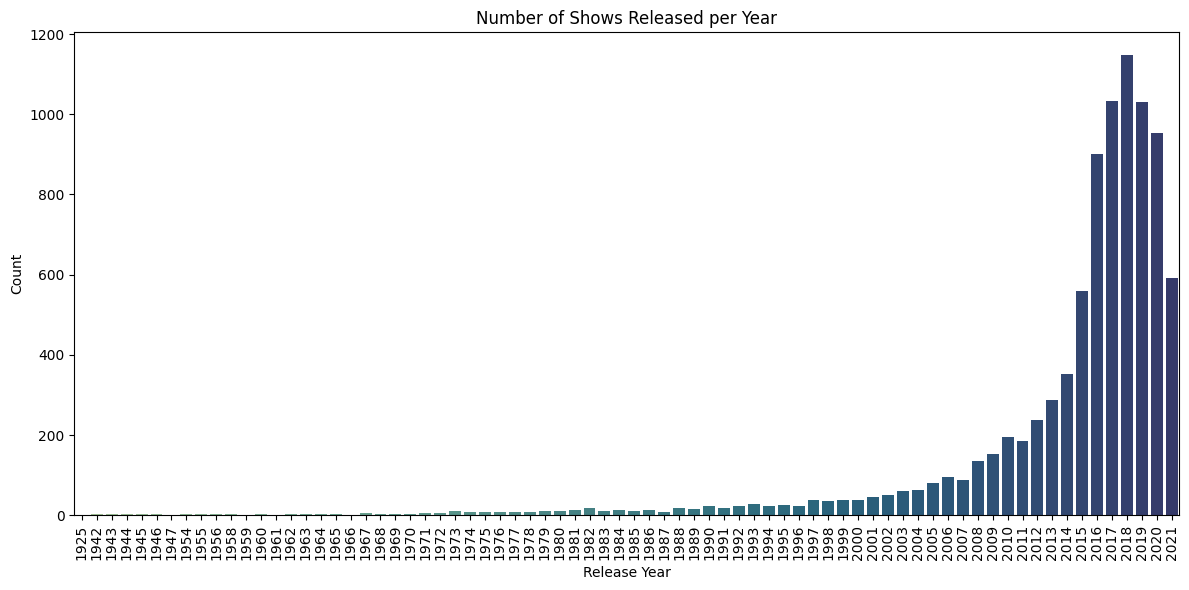

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=netflix, palette='crest', order=sorted(netflix['release_year'].unique()))
plt.title('Number of Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Observations:**
- Most Netflix content is concentrated between 2015–2021, aligning with its global expansion phase.
- There’s a noticeable decline in older content, suggesting Netflix relies heavily on recent releases to attract and retain viewers.
- 2020–2021 peaks often correspond to the COVID era when production shifted to streaming-first releases.

**Recommendations:**
- Leverage Classics: Reacquire or highlight older popular titles to attract nostalgia-driven viewers.
- Trend Tracking: Analyze which release years get the most rewatch or view time.



**Question 2:** Comparison of tv shows vs. movies.

a. Find the number of movies produced in each country and pick the top 10
countries.

Solution : We will apply group by each country and find the count of unique titles of movies

In [ ]:
# Filter for movies and group by country_list, then count unique titles
unique_movie_counts_by_country = netflix_unnested_country[netflix_unnested_country['type']=='Movie'].groupby('country_list')['title'].nunique().sort_values(ascending=False).head(10)
unique_movie_counts_by_country

,title
country_list,
United States,2752
India,962
United Kingdom,534
unknown country,446
Canada,319
France,303
Germany,182
Spain,171
Japan,119


**Observations:**

- The United States dominates movie production on Netflix
- India ranks second, showing its growing global content presence.
- Other consistent contributors are United Kingdom, Canada, France, and Germany.
- The gap between U.S. and other countries shows strong concentration in one region so geographic diversity needs to be focused.

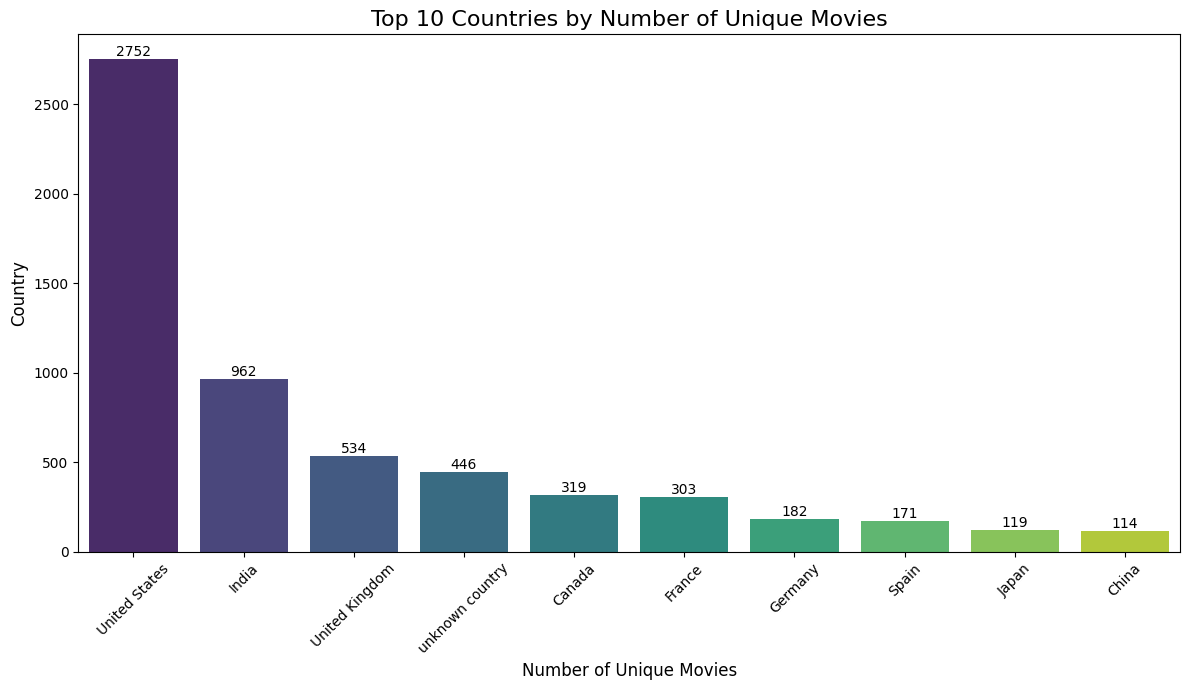

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(y=unique_movie_counts_by_country.values, x=unique_movie_counts_by_country.index, palette='viridis')
plt.title('Top 10 Countries by Number of Unique Movies', fontsize=16)
plt.xlabel('Number of Unique Movies', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
for index, value in enumerate(unique_movie_counts_by_country.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Recommendations/Business Insights:**
- To nullify the dominance of U.S. Netflix should focus on diversifying the content base.
- Investment in Indian cinema can be increased to tap the possible opportunity.
- Similarly, other following countries have scope of improvement.
- To promote global reach multi lingual cinema can be added.

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.
Hint : We want you to apply group by each country and find the count of unique
titles of Tv-shows

In [ ]:
unique_tv_shows_counts_by_country=netflix_unnested_country[netflix_unnested_country['type']=='TV Show'].groupby('country_list')['title'].nunique().sort_values(ascending=False).head(10)
unique_tv_shows_counts_by_country


,title
country_list,
United States,938
unknown country,392
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70


**Observations:**

- The United States again dominates in the number of TV shows produced on Netflix.

- The United Kingdom ranks second, followed by Japan and South Korea, indicating a strong East Asian contribution to Netflix.

- Unlike movies, India's ranking drops significantly for TV shows, suggesting lower investment or demand for serialized Indian content.

- There is still a large data gap for country origin in some shows, which might affect regional analysis accuracy.


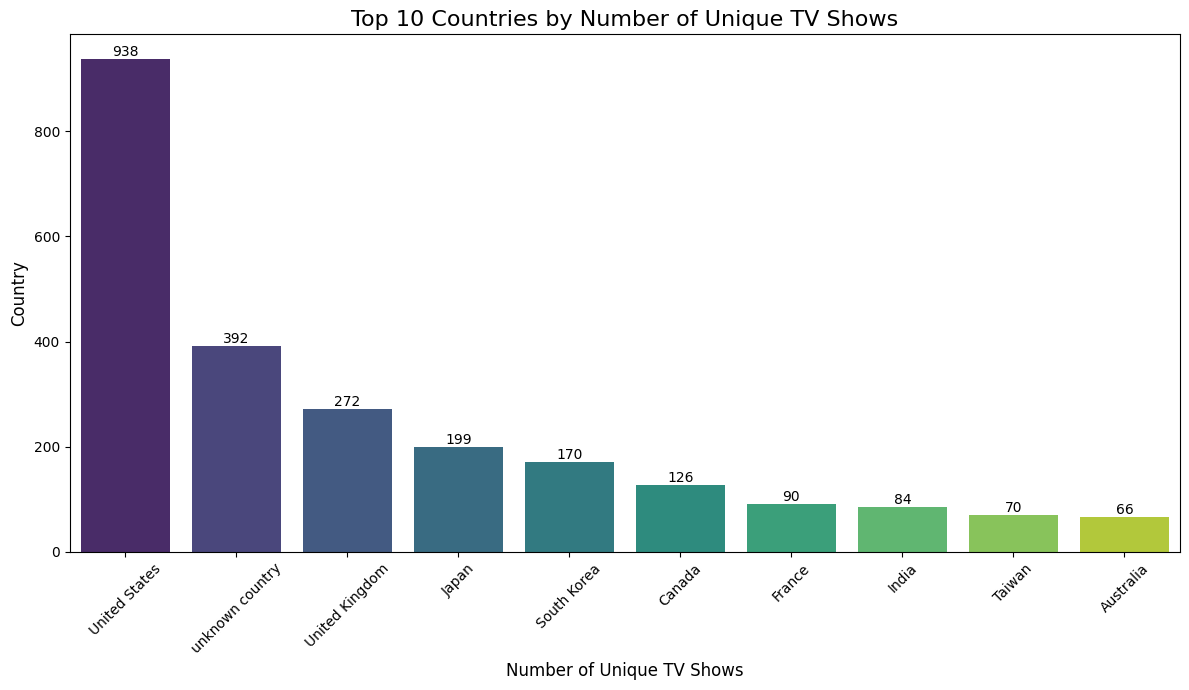

In [ ]:

plt.figure(figsize=(12, 7))
sns.barplot(y=unique_tv_shows_counts_by_country.values, x=unique_tv_shows_counts_by_country.index, palette='viridis')
plt.title('Top 10 Countries by Number of Unique TV Shows', fontsize=16)
plt.xlabel('Number of Unique TV Shows', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
for index, value in enumerate(unique_tv_shows_counts_by_country.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

**Business Insights/ Recommendations:**
- To grow globally, Netflix should expand localized TV content production — especially in India, France, and Germany, where movie production is strong but show production lags.
- Also there is lot of unavailable data so we can work on improve that as well.

**Question 3.**
 What is the best time to launch a TV show?

a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

Solution: We will create a new column and group by each week and count
the total number of movies/ tv shows. First we are doing for movies.

In [ ]:
netflix['date_added'].isna().sum()

np.int64(0)

In [ ]:
netflix_dated=netflix[netflix['date_added']!='unknown date_added']
netflix_dated.shape

(8797, 16)

In [ ]:
netflix_dated['date_added'].isna().sum()

np.int64(0)

In [ ]:
netflix_dated['date_added']=pd.to_datetime(netflix_dated['date_added'],errors='coerce')

In [ ]:
netflix_dated['date_added'].head()

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


In [ ]:
netflix_dated['date_added'].shape

(8797,)

In [ ]:
netflix_dated['date_added'].dtype

dtype('<M8[ns]')

In [ ]:
netflix_dated['week_of_the_year']=netflix_dated['date_added'].dt.strftime('%W')


This command extract the week no. of the year on which the show was released.

In [ ]:
netflix_dated_movies=netflix_dated[netflix_dated['type']=='Movie']

In [ ]:
weekwise_movies_count=netflix_dated_movies.groupby('week_of_the_year')['title'].count().sort_values(ascending=False)
weekwise_movies_count.head(10)

,title
week_of_the_year,
26,256
13,226
00,210
39,200
22,184
35,178
09,174
43,162
31,156


On the 26th week most of the movies are added. After that 13 th week has many movies. 00th week that is the starting of the year has also good number of movies added.

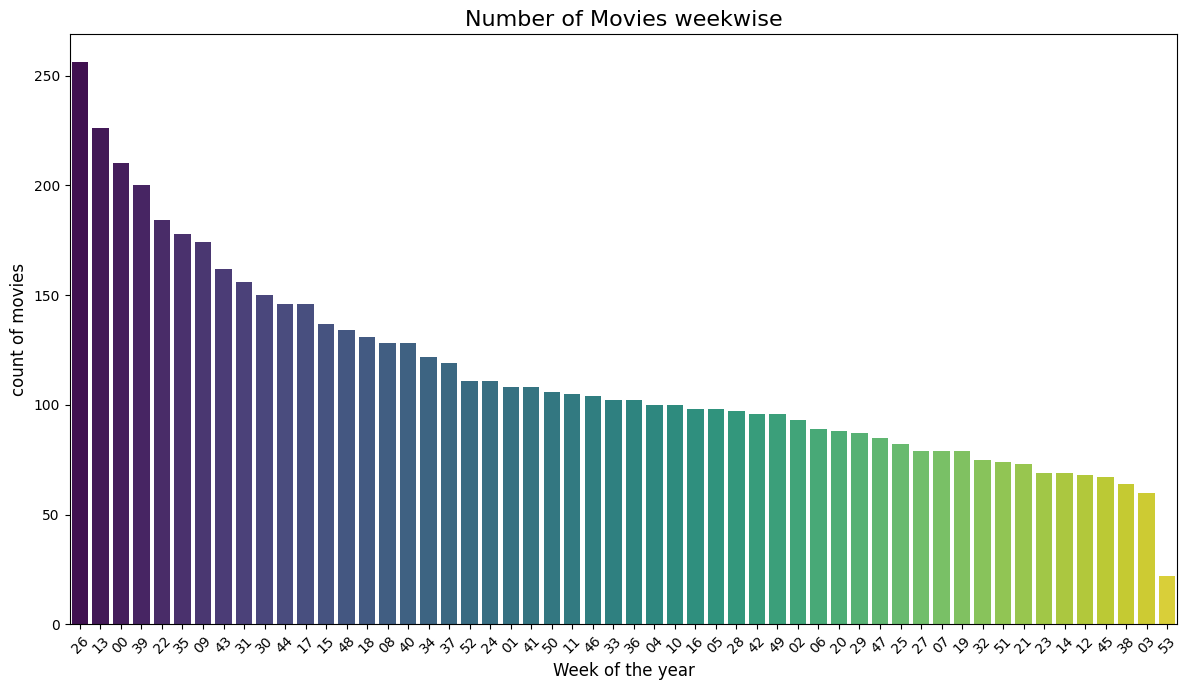

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(y=weekwise_movies_count.values, x=weekwise_movies_count.index, palette='viridis')
plt.title('Number of Movies weekwise', fontsize=16)
plt.xlabel('Week of the year', fontsize=12)
plt.ylabel('count of movies', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**
- The 26th week (around late June) has the highest number of new movie releases on Netflix.
- Other peaks include 13th week (late March) and Week 00 (early January).
- The 53rd week (end of December) consistently has the fewest movie releases — possibly due to post-holiday slowdowns and production cycle gaps.
- This pattern suggests Netflix refreshes its movie catalog mid-year and at the start of Q2.

Now we will do the same for TV Shows.

In [ ]:
netflix_dated_tv_shows=netflix_dated[netflix_dated['type']=='TV Show']
netflix_dated_tv_shows.shape

(2666, 17)

In [ ]:
weekwise_tv_shows_count=netflix_dated_tv_shows.groupby('week_of_the_year')['title'].count().sort_values(ascending=False)
weekwise_tv_shows_count.head(10)

,title
week_of_the_year,
39,90
13,89
26,86
31,81
27,74
35,72
50,69
48,65
24,64


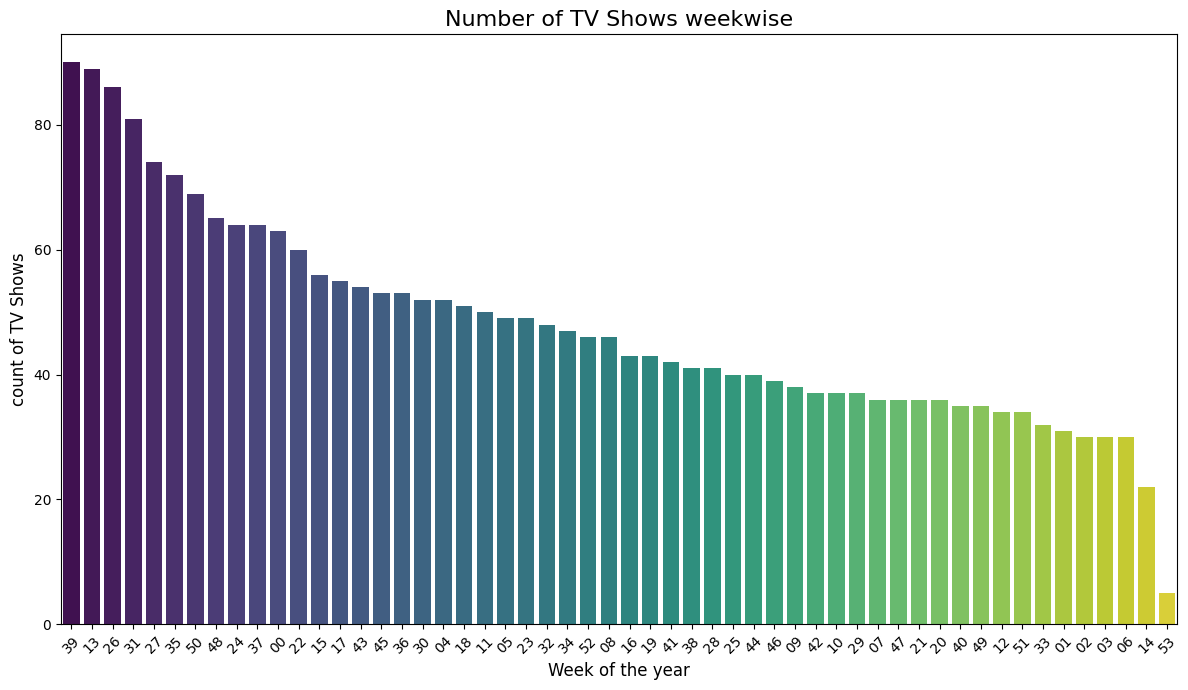

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(y=weekwise_tv_shows_count.values, x=weekwise_tv_shows_count.index, palette='viridis')
plt.title('Number of TV Shows weekwise', fontsize=16)
plt.xlabel('Week of the year', fontsize=12)
plt.ylabel('count of TV Shows', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**

- For TV shows, the 39th, 13th and 26th weeks are the busiest.

- The start of the year (week 00) also shows a smaller but noticeable increase — possibly new-year releases and returning seasons.
- First week of the year has good but not significant number of TV shows addition. But we had a lot movies released in the beginning of the year.

- Similar to movies, week 53 has minimum releases pointing to year-end lull.
 But new comers can choose this time as there is less competition and they might get more visibility.


**Recommendations:**
- Mid-year (26th week) has peak releases for both Movies & TV Shows.This period could be optimal for high-budget content launches.
- Weeks 13 & 39 shows high TV show additions. It shows seasonal audience engagement around spring and fall. Netflix can target series premieres during these periods.
- Week 53 (end of year) has minimal additions. Netflix could use this quiet period to promote existing shows via curated recommendations and recap campaigns.

**b.** Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

Solution: We will create a new column and group by each month and
count the total number of movies/ tv shows. First we are doing for movies.

In [ ]:
netflix_dated['month_of_the_year']=netflix_dated['date_added'].dt.strftime('%m')

This command has separted the month from date added and created a new column. Now we will analyse that.

In [ ]:
netflix_dated_movies=netflix_dated[netflix_dated['type']=='Movie']

In [ ]:
monthwise_movies_count=netflix_dated_movies.groupby('month_of_the_year')['title'].count().sort_values(ascending=False)
monthwise_movies_count.head(12)

,title
month_of_the_year,
07,565
04,550
12,547
01,546
10,545
03,529
09,519
08,519
11,498


July, April, December, January, October has a lot of movie addition. February has the least so it can be improved.

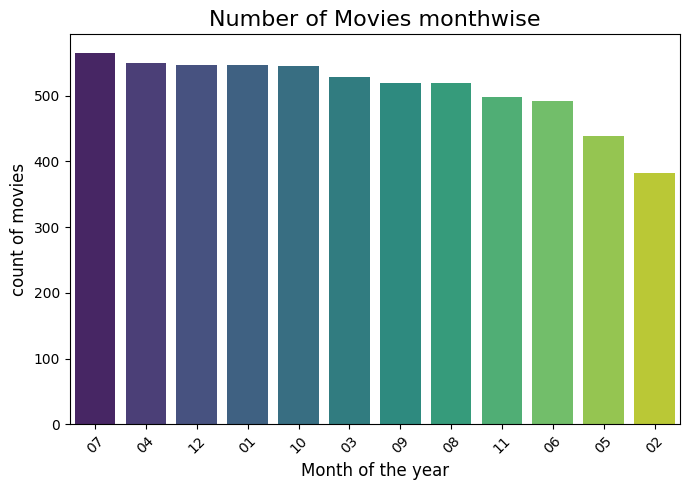

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(y=monthwise_movies_count.values, x=monthwise_movies_count.index, palette='viridis')
plt.title('Number of Movies monthwise', fontsize=16)
plt.xlabel('Month of the year', fontsize=12)
plt.ylabel('count of movies', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**
- July, April, December, and January show the highest movie additions.
- These months correspond to: Mid-year vacation period (July)
New Year / Holiday season (December-January)
- February has the lowest number of movie additions — possibly due to post-holiday downtimes in production.

In [ ]:
netflix_dated_tv_shows=netflix_dated[netflix_dated['type']=='TV Show']

In [ ]:
monthwise_tv_shows_count=netflix_dated_tv_shows.groupby('month_of_the_year')['title'].count().sort_values(ascending=False)
monthwise_tv_shows_count

,title
month_of_the_year,
07,254
12,250
09,246
06,232
08,230
10,210
04,209
03,205
11,199


**Observations:**

- December, July, and September are the peak months for TV show releases possibly because of holiday seasons, mid-year streaming peaks.
- February again shows the least number of additions — same across both Movies and Shows.
- The overlap of July & December suggests Netflix prefers these months for major releases (global audience availability).

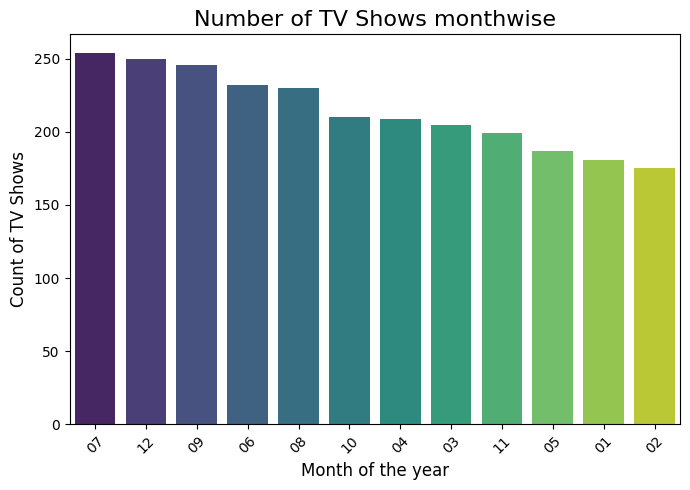

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(y=monthwise_tv_shows_count.values, x=monthwise_tv_shows_count.index, palette='viridis')
plt.title('Number of TV Shows monthwise', fontsize=16)
plt.xlabel('Month of the year', fontsize=12)
plt.ylabel('Count of TV Shows', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Recommendations:**
- Continue launching major global content in July and December to capitalize on high user engagement (summer & holiday seasons).
- April and September show secondary spikes	which can be utilised for regional releases or experimental content.
- February has opportunity to fill content gaps. Netflix should promote niche genres or launch exclusive partnerships to attract off-season viewers.

**Question:4.**
 Analysis of actors/directors of different types of shows/movies.

a. Identify the top 10 actors who have appeared in most movies or TV shows.

Solution : We will group by each actor and find the count of unique titles of
Tv-shows/movies

In [ ]:
netflix_unnested_cast.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,director_list,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Kirsten Johnson],unknown cast
1,s2,TV Show,Blood & Water,unknown director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[unknown director],Ama Qamata
2,s2,TV Show,Blood & Water,unknown director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[unknown director],Khosi Ngema
3,s2,TV Show,Blood & Water,unknown director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[unknown director],Gail Mabalane
4,s2,TV Show,Blood & Water,unknown director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[unknown director],Thabang Molaba


In [ ]:
netflix_actors=netflix_unnested_cast[netflix_unnested_cast['cast_list']!='unknown cast']

In [ ]:
netflix_actor_count=netflix_actors.groupby('cast_list')['title'].count().sort_values(ascending=False).head(10)

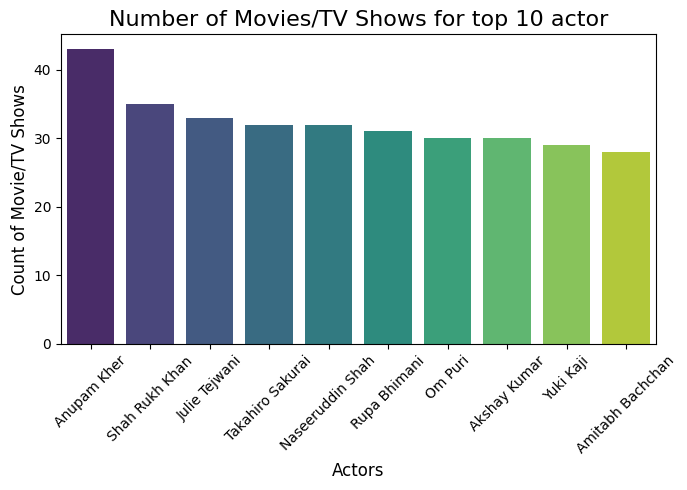

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(y=netflix_actor_count.values, x=netflix_actor_count.index, palette='viridis')
plt.title('Number of Movies/TV Shows for top 10 actor', fontsize=16)
plt.xlabel('Actors', fontsize=12)
plt.ylabel('Count of Movie/TV Shows', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**
- Anupam Kher, Shah Rukh Khan, and Julie Tejwani are the most casted actors on Netflix indicating strong Indian content presence on Netflix.

- The top 10 list is majorly dominated by Indian and U.S. actors indicating dual dominance of these two countries.

- This also shows content diversity — Netflix sources from multiple regions and languages.

**Recommendations:**
- Certain actors appear very frequently	Netflix can leverage their popularity for regional promotions (e.g., “Top 10 Anupam Kher Movies on Netflix India”).
- Indian actors dominate the top 10 list	indicates a strong content presence from Indian. Netflix should continue investing in it.
- Diversity of cast presence	Netflix can highlight international actor collaborations to attract multilingual audiences.

**4(b).** Identify the top 10 directors who have appeared in most movies or TV shows.

Solution : We will group by each director and find the count of unique titles
of Tv-shows/movies

In [ ]:
netflix_unnested_director.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director_list
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",unknown director
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",unknown director
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,unknown director


In [ ]:
netflix_directors=netflix_unnested_director[netflix_unnested_director['director_list']!='unknown director']

In [ ]:
netflix_director_count=netflix_directors.groupby('director_list')['title'].count().sort_values(ascending=False).head(10)
netflix_director_count

,title
director_list,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12


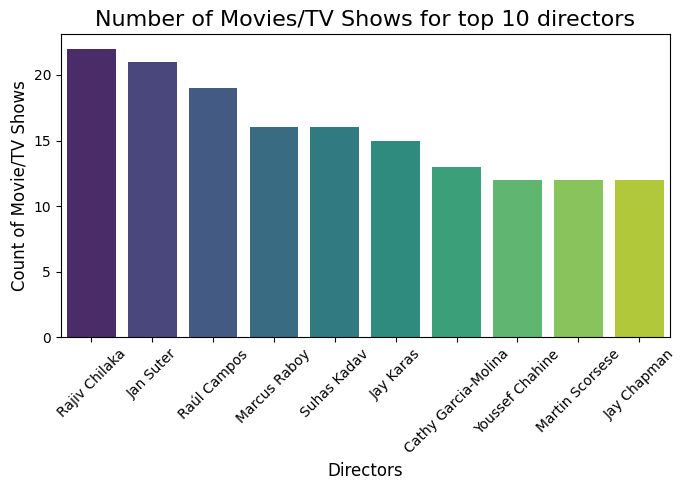

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(y=netflix_director_count.values, x=netflix_director_count.index, palette='viridis')
plt.title('Number of Movies/TV Shows for top 10 directors', fontsize=16)
plt.xlabel('Directors', fontsize=12)
plt.ylabel('Count of Movie/TV Shows', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**
- Rajiv Chilaka, Jan Suter, and Raul Campos are the top directors with the most titles on Netflix.

- Rajiv Chilaka is known for Chhota Bheem and other such series.


**Recommendations:**
- Directors like Rajiv Chilaka dominate Netflix's kids and animation categories	Netflix can leverage these franchises (e.g., Chhota Bheem Universe).
- Latin American directors (Jan Suter & Raul Campos) contribute heavily to stand-up content	Netflix can expand comedy specials globally, dubbing or subtitling in multiple languages.


**Question 5.** Which genre movies are more popular or produced more.

Solution: We will apply the word cloud on the genre columns to know which kind
of genre is produced

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
# Top 10 most frequent listed categories(Non-graphical analysis)
print('Value counts for column: listed_list')
netflix_genre=netflix_unnested_listed['listed_list'].value_counts()
netflix_genre.head(10)


Value counts for column: listed_list


,count
listed_list,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


**Observation:**

- International Movies and Dramas dominate Netflix's library.

- Genres like Comedies, Documentaries, and Action & Adventure are also heavily produced.
- This reflects Netflix's global-first and multi-lingual content expansion strategy.

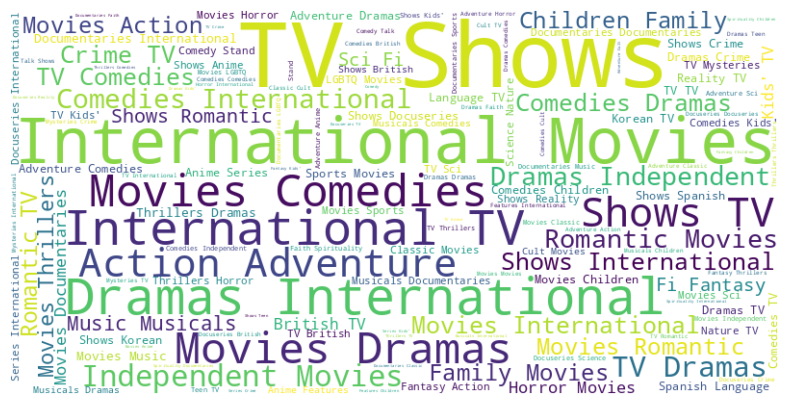

In [ ]:
from wordcloud import WordCloud

# Join all the genres into a single string
all_genres = ' '.join(netflix_unnested_listed['listed_in'].sort_values(ascending=False))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Recommendation:**
- Netflix's library strategy heavily favors international, dramatic, and comedic content — balancing global reach with emotional and cultural universality.
- Strengthening underrepresented genres (like sci-fi, romance, or family content) can help Netflix achieve a more balanced audience portfolio.
-Comedies and Documentaries show growth potential	Netflix can increase partnerships with stand-up comedians and series producers.
- Children & Family content has mid-level frequency	Netflix can expand kid-safe catalog to improve family subscriptions.

6. Find After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)

Solution : We will get the difference between the columns having date added
information and release year information and get the mode of difference. This
will give an insight into what will be the better time to add in Netflix

In [ ]:
netflix_dated.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_list,cast_list,country_list,listed_list,week_of_the_year,month_of_the_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Kirsten Johnson],[unknown cast],[United States],[Documentaries],38,09
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",[unknown director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"[International TV Shows, TV Dramas, TV Mysteries]",38,09


In [ ]:
netflix_dated['date_added'].dtype

dtype('<M8[ns]')

In [ ]:
netflix_dated['year_added']=netflix_dated['date_added'].dt.year

In [ ]:
netflix_dated['year_added'].dtype

dtype('float64')

In [ ]:
netflix_dated['year_diff']=netflix_dated['year_added']-netflix_dated['release_year']

In [ ]:
netflix_dated['year_diff'].sort_values(ascending=False).head(10)

,year_diff
4250,93.0
1331,76.0
8205,75.0
7790,75.0
8739,74.0
8763,74.0
8660,74.0
8436,73.0
8419,73.0
8640,73.0


Observation: This difference shows that Netflix even has very old shows on its platform. The oldest Tv Show on Netflix was released as early as 1925. It was added on Netflix 93 years later its release year.

In [ ]:
netflix_where=netflix[netflix.index==4250]
netflix_where

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_list,cast_list,country_list,listed_list
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,unknown director,unknown cast,unknown country,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,[unknown director],[unknown cast],[unknown country],[TV Shows]


In [ ]:
netflix_dated.groupby('year_diff')['title'].count().sort_values(ascending=False).head(10)

,title
year_diff,
0.0,3222
1.0,1559
2.0,707
3.0,484
4.0,358
5.0,260
6.0,247
7.0,183
8.0,183


Most of the shows on Netflix were added the same year they were released. This number is as large as 3241 out of 8807.

In [ ]:
netflix_dated.groupby('year_diff')['title'].count().sort_values(ascending=False).tail(10)

,title
year_diff,
62.0,2
64.0,2
-3.0,1
-2.0,1
50.0,1
60.0,1
63.0,1
70.0,1
76.0,1


**Observations:**
- Most titles (≈37% of total) are added to Netflix within the same year of their release. This shows Netflix prioritizes recently released content, keeping its content fresh and relevant.

- A smaller portion of titles have a lag of 1-2 years, maybe due to licensing delays.

- Some content has very large gaps (up to 93 years), showing Netflix's strategy to include nostalgic or vintage collections to appeal audiences.

- Even few entries have negative gaps, meaning they were added before the official release year.

**Recommendations:**

- Continue focusing on releasing content the same year it premieres. This aligns with user preference for fresh titles and supports Netflix's competitive positioning.

- Keep a separate section for “Timeless Classics”. It adds cultural depth.

-  Shorten release-to-add delays could improve global parity and user satisfaction.

**Question 7:** How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
netflix_movie_yearwisee=netflix[netflix['type']=='Movie'].groupby('release_year')['title'].count().tail(30)
netflix_shows_yearwisee=netflix[netflix['type']=='TV Show'].groupby('release_year')['title'].count().tail(30)


In [ ]:
netflix_movie_yearwisee

,title
release_year,
1992,20
1993,24
1994,20
1995,23
1996,21
1997,34
1998,32
1999,32
2000,33


In [ ]:
netflix_shows_yearwisee

,title
release_year,
1992,3
1993,4
1994,2
1995,2
1996,3
1997,4
1998,4
1999,7
2000,4


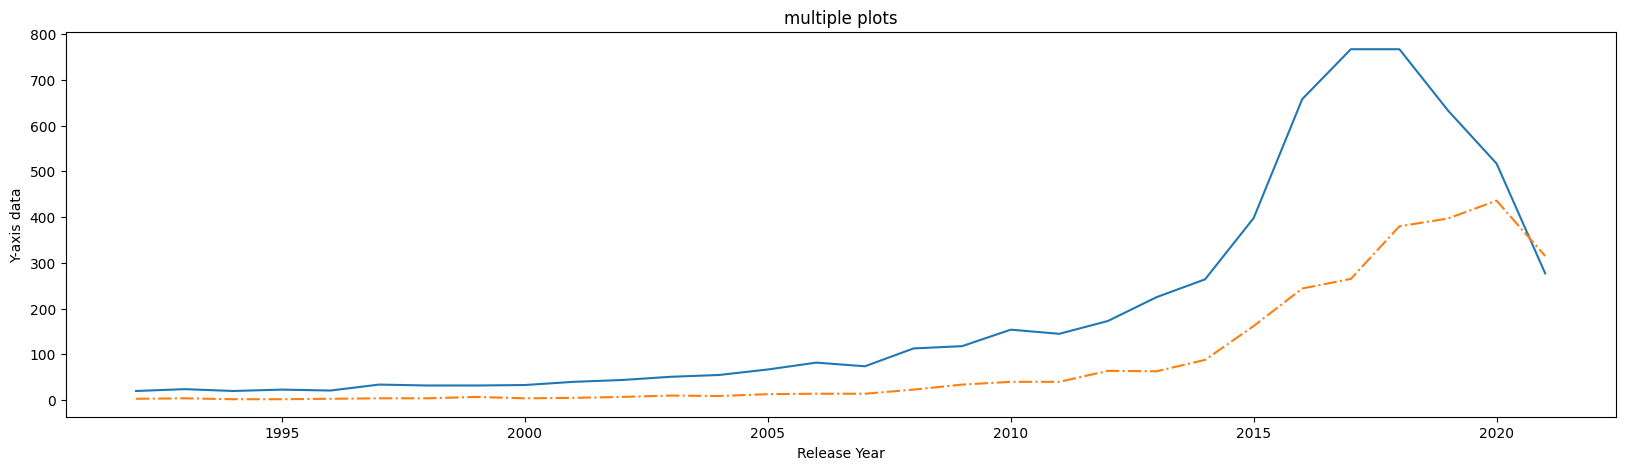

In [ ]:
x = netflix_movie_yearwisee.index
y = netflix_movie_yearwisee.values

plt.figure(figsize=(20,5))
# first plot with X and Y data
plt.plot(x, y)

x1 = netflix_shows_yearwisee.index
y1 = netflix_shows_yearwisee.values

# second plot with x1 and y1 data
plt.plot(x1, y1, '-.')

plt.xlabel("Release Year")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()

**Observations:**
- Over the past 20-30 years, Netflix has seen a steady increase in the number of Movies and TV Shows added, with a significant grown between 2014-2018.

- The platform peaked around 2017-2018, marking the height of Netflix's original content expansion phase.

- After 2019, there's a noticeable decline in the number of new releases — possibly due to the rise of strong competitors (Disney+, Amazon Prime, etc.) or COVID-19 production delays (post-2020).

- Despite the slowdown, Netflix continues to maintain a consistent flow of new content, balancing quality and quantity.

**Recommendations:**
- Revitalize growth by focusing on high-performing genres and untapped regional markets.

- Leverage Data Insights and identify the specific genres or regions that drove the 2017-2018 surge, and replicate their success.

- Collaborate More Globally and increase co-productions and local-language content to maintain audience engagement across countries.

- Strategic Release Planning: Use historical release data to optimize release schedules throughout the year rather than concentrated bursts.

**Key Insights Summary:**

- Majority of Netflix content are Movies.

- 26th week and July–December months are best for new releases.

- Anupam Kher and Shah Rukh Khan are top actors on Netflix.

- Rajiv Chilaka is the most frequent director.

- International TV Shows and Dramas dominate Netflix's content type.

- Most shows are added the same year they're released, optimizing audience engagement.

- Netflix's growth peaked in 2017-2018, after which a gradual decline began — possibly due to market competition.

**Business Recommendations:**

- Schedule new content during July-December for maximum audience engagement.

- Increase variety in underrepresented months (e.g., February) to maintain steady engagement.

- Partner more with top-performing actors/directors identified in data.

- Strengthen high-performing genres like International TV Shows and Dramas and explore new niches for diversification.

- Analyze declining years and boost investment in quality, regional, and original content.